# Initial import

In [1]:
import saspy
import pandas as pd
from IPython.display import HTML

# Start a SAS session
In the following code we start a SAS session named sas using the winlocal configuration. You can ignore the cfgname option, SAS will pop up a window with connection method. then you can choose one from them.

After a connection is made and a SAS session is started, a note that is similar to the the one below is displayed.

In [2]:
sas = saspy.SASsession(cfgname='winlocal')

SAS Connection established. Subprocess id is 18120



# Begin data analysis

In [4]:
df = sas.sasdata(table='heart', libref='sashelp')
df.head()

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol,Chol_Status,BP_Status,Weight_Status,Smoking_Status
0,Dead,Other,NaN,Female,29,62.50,140,78,124,121,0,55.0,NaN,,Normal,Overweight,Non-smoker
1,Dead,Cancer,NaN,Female,41,59.75,194,92,144,183,0,57.0,181.0,Desirable,High,Overweight,Non-smoker
2,Alive,,NaN,Female,57,62.25,132,90,170,114,10,NaN,250.0,High,High,Overweight,Moderate (6-15)
3,Alive,,NaN,Female,39,65.75,158,80,128,123,0,NaN,242.0,High,Normal,Overweight,Non-smoker
4,Alive,,NaN,Male,42,66.00,156,76,110,116,20,NaN,281.0,High,Optimal,Overweight,Heavy (16-25)


In [5]:
df.means()

,Variable,Label,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
0,AgeCHDdiag,.,1449,3760,63.0,63.302968,10.018215,32.0,57.00,63.0,70.0,90.0
1,AgeAtStart,.,5209,0,43.0,44.068727,8.574954,28.0,37.00,43.0,51.0,62.0
2,Height,.,5203,6,64.5,64.813185,3.582707,51.5,62.25,64.5,67.5,76.5
3,Weight,.,5203,6,150.0,153.086681,28.915426,67.0,132.00,150.0,172.0,300.0
4,Diastolic,.,5209,0,84.0,85.358610,12.973091,50.0,76.00,84.0,92.0,160.0
5,Systolic,.,5209,0,132.0,136.909580,23.739596,82.0,120.00,132.0,148.0,300.0
6,MRW,.,5203,6,118.0,119.957525,19.983401,67.0,106.00,118.0,131.0,268.0
7,Smoking,.,5173,36,1.0,9.366518,12.031451,0.0,0.00,1.0,20.0,60.0
8,AgeAtDeath,.,1991,3218,71.0,70.536414,10.559406,36.0,63.00,71.0,79.0,93.0
9,Cholesterol,.,5057,152,223.0,227.417441,44.935524,96.0,196.00,223.0,255.0,568.0



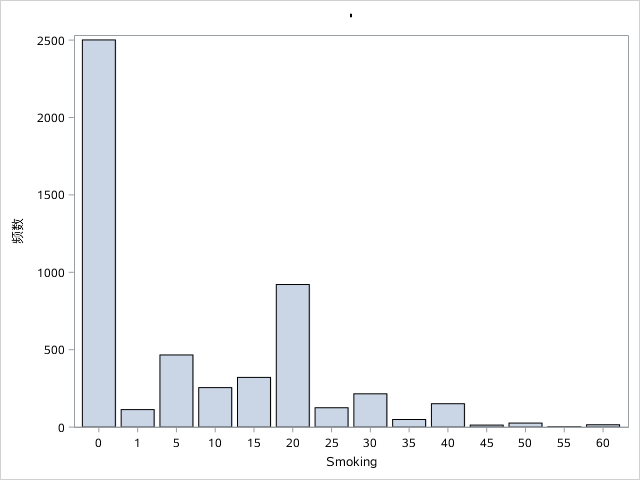

In [6]:
df.bar(var='Smoking')

In [10]:
df_pd = df.to_frame()
df_pd.describe()

,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol
count,1449.000000,5209.000000,5203.000000,5203.000000,5209.000000,5209.000000,5203.000000,5173.000000,1991.000000,5057.000000
mean,63.302968,44.068727,64.813185,153.086681,85.358610,136.909580,119.957525,9.366518,70.536414,227.417441
std,10.018215,8.574954,3.582707,28.915426,12.973091,23.739596,19.983401,12.031451,10.559406,44.935524
min,32.000000,28.000000,51.500000,67.000000,50.000000,82.000000,67.000000,0.000000,36.000000,96.000000
25%,57.000000,37.000000,62.250000,132.000000,76.000000,120.000000,106.000000,0.000000,63.000000,196.000000
50%,63.000000,43.000000,64.500000,150.000000,84.000000,132.000000,118.000000,1.000000,71.000000,223.000000
75%,70.000000,51.000000,67.500000,172.000000,92.000000,148.000000,131.000000,20.000000,79.000000,255.000000
max,90.000000,62.000000,76.500000,300.000000,160.000000,300.000000,268.000000,60.000000,93.000000,568.000000


In [8]:
df_pd

method

In [ ]:
df_pd.


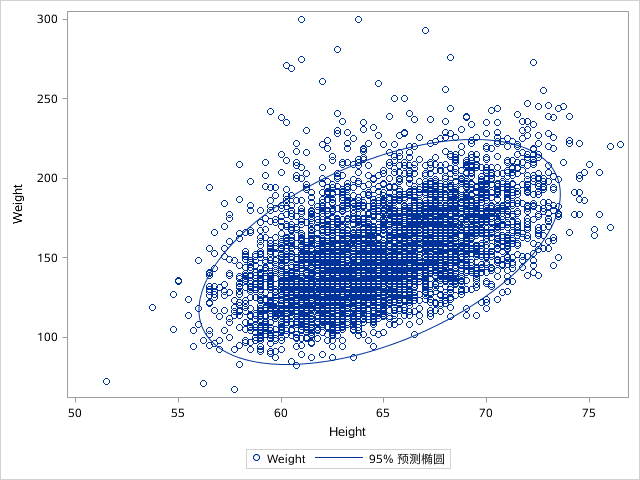

In [12]:
%%SAS
proc sgplot data=sashelp.heart;
    scatter x=height y=weight;
    ellipse x=height y=weight;
run;

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [16]:
corr = df_pd.corr()
corr

,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol
AgeCHDdiag,1.000000,0.550909,-0.210416,-0.137415,-0.035105,0.069241,0.006422,-0.283567,0.748112,0.003629
AgeAtStart,0.550909,1.000000,-0.131733,0.093519,0.275401,0.379379,0.204515,-0.167431,0.688605,0.273415
Height,-0.210416,-0.131733,1.000000,0.517385,-0.014245,-0.071127,-0.136289,0.287032,-0.136575,-0.079587
Weight,-0.137415,0.093519,0.517385,1.000000,0.327568,0.263584,0.767171,0.088703,0.004604,0.072428
Diastolic,-0.035105,0.275401,-0.014245,0.327568,1.000000,0.796061,0.385110,-0.064121,0.010039,0.183364
Systolic,0.069241,0.379379,-0.071127,0.263584,0.796061,1.000000,0.362574,-0.092378,0.102174,0.199350
MRW,0.006422,0.204515,-0.136289,0.767171,0.385110,0.362574,1.000000,-0.125237,0.102925,0.137355
Smoking,-0.283567,-0.167431,0.287032,0.088703,-0.064121,-0.092378,-0.125237,1.000000,-0.285249,-0.011780
AgeAtDeath,0.748112,0.688605,-0.136575,0.004604,0.010039,0.102174,0.102925,-0.285249,1.000000,0.078444
Cholesterol,0.003629,0.273415,-0.079587,0.072428,0.183364,0.199350,0.137355,-0.011780,0.078444,1.000000


In [20]:
import matplotlib.pyplot as plt

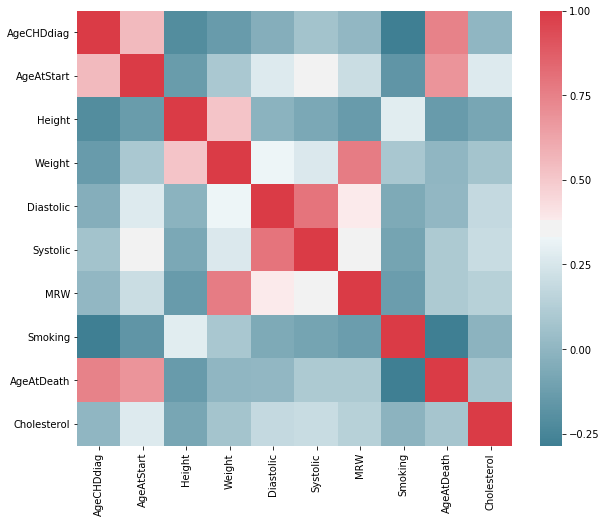

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)